In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import linalg
from scipy import stats
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

from sklearn.metrics import accuracy_score

In [5]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [6]:
yelp_data = pd.read_csv(filepath_or_buffer = r"C:\Users\visha\Desktop\Info659_Assignment_1\Yelp_Usefulness_Assignment2_1.csv", sep = ",", header=0 )

In [7]:
print(yelp_data.head(20))

                   review_id  review_stars  word_count  lexical_diversity  \
0     bRGHgwAd3zfiiDMT9JyKcA             1          23           0.869565   
1     TK-0pfhHorvwZK0YhDe2fQ             5          26           0.769231   
2     XTOQ6blQzzzoK26QRJl3zg             5          71           0.760563   
3     KA9VwKYL-7I2LuQnXeuEBw             5          74           0.689189   
4     C2kblEfR4oMWR9oGhYN2cQ             5          31           0.903226   
5     mTA_VwPiWw6cubKHAsrIkQ             5          32           0.875000   
6     cnZI2W7C-D_w38WHMRer3w             1         124           0.572581   
7     UlxgrLCL9WOjJL5hZ1Zd9A             2         374           0.631016   
8     P5Sx85NU3sALCtbOx1Qgvg             2          45           0.888889   
9     Agb8ItmoRPyXPdQ8jLEgJw             4          60           0.633333   
10    g-JmmzYa4PDRKTWhuXPurg             5          21           0.761905   
11  "-jxAByrXxlQXMYbx-s37JQ"             5          97           0.762887   

In [8]:
# Data Cleaning 1 :- Handling missing Values 
print(yelp_data.shape)

(1005, 26)


In [9]:
## there is 1 id which has multiple repeatations
print(yelp_data[["review_id", "class"]].describe())

                     review_id   class
count                     1005    1005
unique                    1000       3
top     rTOlJ2zPkn5IH06D37A8-w  useful
freq                         6     498


In [10]:
yelp_data.drop_duplicates('review_id', keep='last')

,review_id,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,...,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count,class
0,bRGHgwAd3zfiiDMT9JyKcA,1,23,0.869565,0.869565,0.000000,0,0.0,0.000000,0.0,...,0.000000,81.1310,5,24,0,0.000000,0.000000,3.0,40,useful
1,TK-0pfhHorvwZK0YhDe2fQ,5,26,0.769231,0.846154,0.000000,0,0.0,0.000000,0.0,...,0.000000,48.9568,22,6,1,0.000000,0.000000,4.5,319,useful
2,XTOQ6blQzzzoK26QRJl3zg,5,71,0.760563,0.943662,0.014085,0,0.0,0.000000,0.0,...,0.000000,95.9393,10,14,0,0.000000,0.000000,4.5,535,not_useful
3,KA9VwKYL-7I2LuQnXeuEBw,5,74,0.689189,0.905405,0.000000,0,0.0,0.000000,0.0,...,0.000000,86.9222,1,3,0,0.000000,0.000000,5.0,28,useful
4,C2kblEfR4oMWR9oGhYN2cQ,5,31,0.903226,0.903226,0.000000,0,0.0,0.000000,0.0,...,0.000000,63.0018,19,40,0,0.000000,0.000000,3.5,84,useful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,t-afIbGob3-DN0em1LZ8Gw,4,187,0.604278,0.855615,0.000000,0,0.0,0.005319,0.0,...,0.000000,78.5285,113,28,164,0.001275,0.051653,4.0,451,useful
997,BJSVOToo8x-EmZ_zwKZDhA,5,87,0.712644,0.724138,0.034483,0,0.0,0.000000,0.0,...,0.000000,69.3965,5,41,0,0.000000,NaN,4.5,35,useful
998,05wE77eDWFTJCMfUVc-eUw,4,127,0.724409,0.905512,0.000000,0,0.0,0.007812,0.0,...,0.007812,85.0490,30,43,0,0.000000,0.000000,2.5,18,not_useful
999,fiNrQB3RTZSYnnKEfRcdpQ,2,323,0.513932,0.835913,0.003096,0,0.0,0.000000,0.0,...,0.000000,96.1738,4,5,0,0.000000,0.000000,2.5,33,useful


In [11]:
print(yelp_data[["review_id"]].describe())

                     review_id
count                     1005
unique                    1000
top     rTOlJ2zPkn5IH06D37A8-w
freq                         6


In [12]:
## check the missing values across tuples of the "liking" attribute
print(yelp_data.isna().sum())

review_id                0
review_stars             0
word_count               0
lexical_diversity        0
correct_spell_ratio      0
price_included           0
procon_included          0
joy                      0
love                     0
affection                0
liking                   0
enthusiasm               0
sadness                  0
dislike                  0
despair                  0
horror                   0
distress                 0
FleschReadingEase        0
user_review_count        0
yelping_months           0
degree                   0
betweenness              0
eigenvector              5
business_stars           0
business_review_count    0
class                    0
dtype: int64


In [13]:
print(yelp_data["eigenvector"].isna())

0       False
1       False
2       False
3       False
4       False
        ...  
1000    False
1001    False
1002    False
1003    False
1004    False
Name: eigenvector, Length: 1005, dtype: bool


Text(0.5, 1.0, "The normalized number of words related to 'eigenvector ' sentiment")

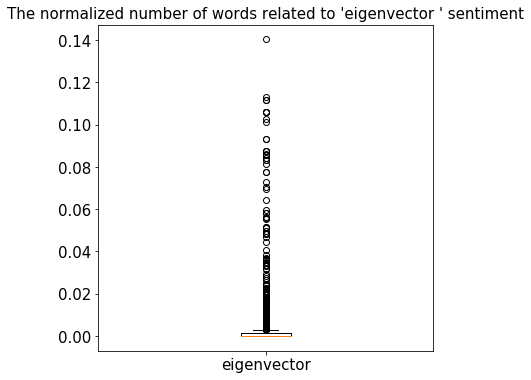

In [14]:
## Initialize a 6 x 6in figure
fig = plt.figure(figsize = (6, 6))

## Make the box plot
plt.boxplot(
    ## We beed to drop tuples that include missing values
    yelp_data["eigenvector"][~yelp_data["eigenvector"].isna()], labels = ["eigenvector"]
)

## Adjust the tick and label font size
plt.tick_params(labelsize = 15)

## Set the title
plt.title("The normalized number of words related to 'eigenvector ' sentiment", fontsize = 15)


In [15]:
## We should exclude missing tuples to get median
median = np.median(yelp_data["eigenvector"][~yelp_data["eigenvector"].isna()])
print ("The median is: ", median)

The median is:  0.0


In [16]:
median = np.median(yelp_data["eigenvector"][~yelp_data["eigenvector"].isna()])

In [17]:
print ("The median is: ", median)

The median is:  0.0


In [18]:
## Replace missing values with median 
yelp_data["eigenvector"].fillna(median, inplace=True)

In [19]:
## Check whether the missing value were filled
print(yelp_data.isna().sum())

review_id                0
review_stars             0
word_count               0
lexical_diversity        0
correct_spell_ratio      0
price_included           0
procon_included          0
joy                      0
love                     0
affection                0
liking                   0
enthusiasm               0
sadness                  0
dislike                  0
despair                  0
horror                   0
distress                 0
FleschReadingEase        0
user_review_count        0
yelping_months           0
degree                   0
betweenness              0
eigenvector              0
business_stars           0
business_review_count    0
class                    0
dtype: int64


In [20]:
#DataCleaning 2 :- check redundancies by applying correlation analysis.

pcorr = yelp_data.corr(method='pearson')

## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)
pcorr

,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,liking,enthusiasm,sadness,dislike,despair,horror,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count
review_stars,1.000000,-0.119761,0.190640,0.056250,-0.067017,-0.033711,0.028602,0.194113,-0.004699,0.070236,-0.013992,-0.017161,NaN,-0.053762,-0.173935,-0.022972,-0.091582,0.043901,-0.004525,0.032733,0.026832,0.027894,0.519574,0.072913
word_count,-0.119761,1.000000,-0.716394,-0.058039,0.004092,0.004359,-0.009654,-0.073131,0.047246,0.413489,0.086291,0.020155,NaN,-0.015852,-0.030181,0.068709,-0.103032,0.292242,0.176222,0.244525,0.157173,0.265675,-0.042280,0.059012
lexical_diversity,0.190640,-0.716394,1.000000,-0.047854,-0.024789,-0.000423,0.026467,0.046843,-0.052589,-0.176726,-0.056771,-0.015972,NaN,-0.006016,0.016658,-0.083535,-0.074040,-0.155484,-0.109915,-0.163583,-0.085445,-0.175648,0.068175,-0.035129
correct_spell_ratio,0.056250,-0.058039,-0.047854,1.000000,-0.027980,-0.049846,-0.015208,0.047172,0.011316,-0.013024,-0.008527,0.021037,NaN,0.002783,0.044026,0.015562,0.208325,-0.099949,-0.044698,-0.028899,-0.016192,-0.037874,0.020173,-0.015804
price_included,-0.067017,0.004092,-0.024789,-0.027980,1.000000,-0.019108,-0.015081,-0.048512,-0.009722,-0.026341,-0.029988,0.010520,NaN,-0.015081,-0.000985,-0.029513,-0.008985,-0.013918,0.021178,-0.033825,-0.042239,-0.023776,-0.047751,0.036399
procon_included,-0.033711,0.004359,-0.000423,-0.049846,-0.019108,1.000000,-0.001727,-0.006089,-0.002431,-0.004241,-0.003619,-0.003788,NaN,-0.001727,-0.008490,-0.005370,-0.064465,0.165273,0.021984,0.096406,0.059265,0.094487,-0.033555,-0.023137
joy,0.028602,-0.009654,0.026467,-0.015208,-0.015081,-0.001727,1.000000,-0.009062,-0.001402,-0.002446,-0.002088,-0.002185,NaN,-0.000996,-0.004897,-0.003098,-0.010843,-0.011202,-0.029516,-0.010223,-0.005911,-0.010184,0.029924,-0.014605
love,0.194113,-0.073131,0.046843,0.047172,-0.048512,-0.006089,-0.009062,1.000000,0.008083,0.007075,-0.009344,0.014531,NaN,-0.009062,-0.024294,-0.004120,0.051136,-0.023921,-0.046212,-0.014156,-0.016191,-0.015260,0.115236,-0.030900
affection,-0.004699,0.047246,-0.052589,0.011316,-0.009722,-0.002431,-0.001402,0.008083,1.000000,-0.003443,-0.002938,-0.003076,NaN,-0.001402,-0.006893,-0.004360,0.028226,0.000179,0.020741,0.024932,0.000703,0.042257,0.009350,-0.002888
liking,0.070236,0.413489,-0.176726,-0.013024,-0.026341,-0.004241,-0.002446,0.007075,-0.003443,1.000000,-0.005126,-0.005366,NaN,-0.002446,-0.012025,-0.007606,-0.022942,-0.021638,-0.101622,-0.023916,-0.014515,-0.024822,0.073482,0.014031


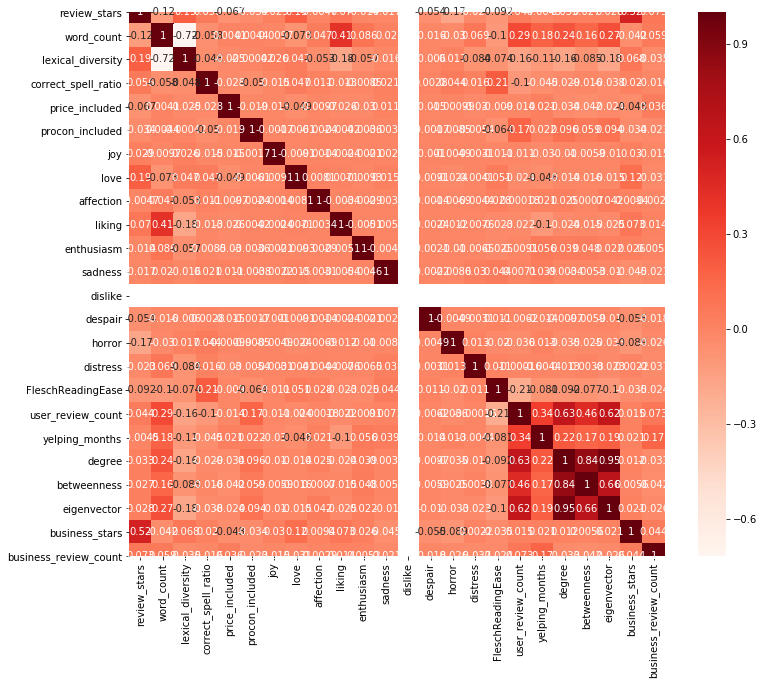

In [21]:
#heatmap to visualize the correlation coefficients
plt.figure(figsize=(12,10))
sns.heatmap(pcorr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
#strongest correlation (0.94) between degree and eigenvector. The degree and betweenness are also strongly correlated (0.83). These results represent redundancies in attributes
    
yelp_data.drop('eigenvector', axis=1, inplace=True)    
yelp_data.drop('betweenness', axis=1, inplace=True)    
    

In [23]:
print(yelp_data.isna().sum())

review_id                0
review_stars             0
word_count               0
lexical_diversity        0
correct_spell_ratio      0
price_included           0
procon_included          0
joy                      0
love                     0
affection                0
liking                   0
enthusiasm               0
sadness                  0
dislike                  0
despair                  0
horror                   0
distress                 0
FleschReadingEase        0
user_review_count        0
yelping_months           0
degree                   0
business_stars           0
business_review_count    0
class                    0
dtype: int64


In [24]:
yelp_data["positive_emotion"] = yelp_data["joy"] + yelp_data["love"] + yelp_data["affection"] + yelp_data["liking"] + yelp_data["enthusiasm"]
yelp_data["negative_emotion"] = yelp_data["sadness"] + yelp_data["dislike"] + yelp_data["despair"] + yelp_data["horror"] + yelp_data["distress"]

## Drop existing attributes
yelp_data = yelp_data.drop(["joy", "love", "affection", "liking", "enthusiasm", "sadness", "dislike", "despair", "horror", "distress"], 1)    

print(yelp_data.head())

                review_id  review_stars  word_count  lexical_diversity  \
0  bRGHgwAd3zfiiDMT9JyKcA             1          23           0.869565   
1  TK-0pfhHorvwZK0YhDe2fQ             5          26           0.769231   
2  XTOQ6blQzzzoK26QRJl3zg             5          71           0.760563   
3  KA9VwKYL-7I2LuQnXeuEBw             5          74           0.689189   
4  C2kblEfR4oMWR9oGhYN2cQ             5          31           0.903226   

   correct_spell_ratio  price_included  procon_included  FleschReadingEase  \
0             0.869565        0.000000                0            81.1310   
1             0.846154        0.000000                0            48.9568   
2             0.943662        0.014085                0            95.9393   
3             0.905405        0.000000                0            86.9222   
4             0.903226        0.000000                0            63.0018   

   user_review_count  yelping_months  degree  business_stars  \
0                  5  

In [25]:
yelp_data["review_id"].value_counts()

rTOlJ2zPkn5IH06D37A8-w    6
Rwd60Rk_8m_9ryQChhSRcA    1
DrCDLf1wJ2Tsq30vtswilw    1
vRo3tjgDFAF9p0Ml3he-0g    1
A3-_yNu7tYwc-B07DTI3YA    1
                         ..
sGvR4DZM3zrQR93NgL6V_w    1
2v74LUhxKZea7x3Cp7W6Ng    1
BmtGXCpRrHWrMwgiZ58tYQ    1
us5ZGTpuPTcpGiGuLkeldQ    1
EQ5SJO8LM9WBlqon7YFftQ    1
Name: review_id, Length: 1000, dtype: int64

In [26]:
# Data Cleaning 3 :- Dimensionality Reduction + Normalization

## Create feature matrix by dropping the review_id and label attribute
## Review_id is not going to helpful to predict the usefulness of reviews
X = yelp_data.drop(["review_id","class"], 1)    





In [27]:
X

,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,FleschReadingEase,user_review_count,yelping_months,degree,business_stars,business_review_count,positive_emotion,negative_emotion
0,1,23,0.869565,0.869565,0.000000,0,81.1310,5,24,0,3.0,40,0.000000,0.0
1,5,26,0.769231,0.846154,0.000000,0,48.9568,22,6,1,4.5,319,0.000000,0.0
2,5,71,0.760563,0.943662,0.014085,0,95.9393,10,14,0,4.5,535,0.000000,0.0
3,5,74,0.689189,0.905405,0.000000,0,86.9222,1,3,0,5.0,28,0.000000,0.0
4,5,31,0.903226,0.903226,0.000000,0,63.0018,19,40,0,3.5,84,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,5,579,0.537133,0.872193,0.001727,0,74.8321,31,2,1,4.5,498,0.005172,0.0
1001,5,579,0.537133,0.872193,0.001727,0,74.8321,31,2,1,4.5,498,0.005172,0.0
1002,5,579,0.537133,0.872193,0.001727,0,74.8321,31,2,1,4.5,498,0.005172,0.0
1003,5,579,0.537133,0.872193,0.001727,0,74.8321,31,2,1,4.5,498,0.005172,0.0


In [28]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
y = yelp_data["class"].value_counts()
y

useful        498
not_useful    482
not useful     25
Name: class, dtype: int64

In [29]:
clf = LogisticRegression()
## Pre-processing. Sklearn takes integer as label
## Create target attribute
yelp_data[yelp_data['class'] == 'useful'] = 1
yelp_data[yelp_data['class'] == 'not_useful'] = 0
yelp_data[yelp_data['class'] == 'not useful'] = 0
## Specify the data type. Before specifying, the type was unknown
y = yelp_data["class"].astype('int')



In [30]:
y

0       1
1       1
2       0
3       1
4       1
       ..
1000    1
1001    1
1002    1
1003    1
1004    1
Name: class, Length: 1005, dtype: int32

In [31]:
X

,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,FleschReadingEase,user_review_count,yelping_months,degree,business_stars,business_review_count,positive_emotion,negative_emotion
0,1,23,0.869565,0.869565,0.000000,0,81.1310,5,24,0,3.0,40,0.000000,0.0
1,5,26,0.769231,0.846154,0.000000,0,48.9568,22,6,1,4.5,319,0.000000,0.0
2,5,71,0.760563,0.943662,0.014085,0,95.9393,10,14,0,4.5,535,0.000000,0.0
3,5,74,0.689189,0.905405,0.000000,0,86.9222,1,3,0,5.0,28,0.000000,0.0
4,5,31,0.903226,0.903226,0.000000,0,63.0018,19,40,0,3.5,84,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,5,579,0.537133,0.872193,0.001727,0,74.8321,31,2,1,4.5,498,0.005172,0.0
1001,5,579,0.537133,0.872193,0.001727,0,74.8321,31,2,1,4.5,498,0.005172,0.0
1002,5,579,0.537133,0.872193,0.001727,0,74.8321,31,2,1,4.5,498,0.005172,0.0
1003,5,579,0.537133,0.872193,0.001727,0,74.8321,31,2,1,4.5,498,0.005172,0.0


In [32]:
## Create a model
clf = LogisticRegression()
clf.fit(X, y)

## predict target class based on the trained model 
predictions = clf.predict(X)

## Calculate the performance of the classifier
accuracy = accuracy_score(predictions, y)

print(accuracy)

0.7502487562189055


C:\Users\visha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
## Apply z-transformation
z_scaler = preprocessing.StandardScaler()
X_scaled = z_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)


In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns = X.columns)

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
## Apply z-transformation
z_scaler = preprocessing.StandardScaler()
X_scaled = z_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
## Sequential Forward Selection(sbs)
sbs = SFS(LogisticRegression(),k_features=(1,X_scaled.shape[1]),forward=False,floating=False,scoring = 'accuracy',cv = 10,n_jobs=-1)
sbs = sbs.fit(X_scaled, y)
## Get the final set of features
print(sbs.k_feature_names_)
X_selected = sbs.transform(X_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
clf.fit(X_selected, y)
predictions = clf.predict(X_selected)
## Calculate the performance of the classifier
accuracy = accuracy_score(predictions, y)
print("The Accuracy is :", accuracy)

C:\Users\visha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\visha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

('review_stars', 'word_count', 'FleschReadingEase', 'yelping_months', 'degree')
The Accuracy is : 0.7601990049751244


C:\Users\visha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
accuracy = accuracy_score(predictions, y)

print(accuracy)

0.7601990049751244
